In [1]:
# Importanweisungen

import os
import re
import numpy as np
import statistics as stat
import scipy as sci
import scipy.fftpack
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.axes as axes
import matplotlib.patches as patches
from matplotlib import colors as mcolors
import math
from scipy import optimize
import uncertainties as unc
import uncertainties.unumpy as unp
import uncertainties.umath as umath
unv=unp.nominal_values
usd=unp.std_devs

import hyperspy.api as hs
import hyperspy.io as io
hs.preferences.GUIs.warn_if_guis_are_missing = False
hs.preferences.save()


Absolute quantification:
Elem.	Intensity
B	0.046439
N	0.086660


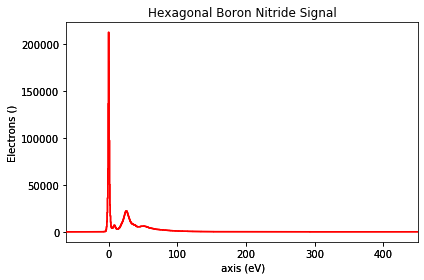

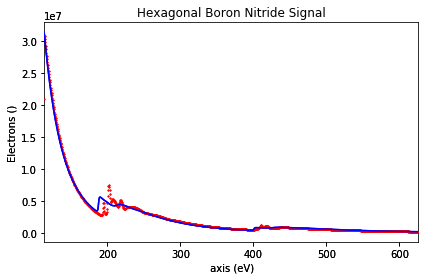

In [6]:
s = hs.datasets.eelsdb(title="Hexagonal Boron Nitride",
                        spectrum_type="coreloss")[0]
ll = hs.datasets.eelsdb(title="Hexagonal Boron Nitride",
                         spectrum_type="lowloss")[0]
s.set_microscope_parameters(beam_energy=100,
                             convergence_angle=0.2,
                             collection_angle=2.55)
s.add_elements(('B', 'N'))
m = s.create_model(ll=ll)
m.components
m.multifit(kind='smart')
m.quantify()
#s.plot()
ll.plot()
m.plot()

In [3]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 2.55
│       ├── beam_energy = 100
│       ├── convergence_angle = 0.2
│       └── microscope = JEOL 3000F
├── General
│   ├── author = Giovanni Bertoni
│   └── title = Hexagonal Boron Nitride
├── Sample
│   ├── chemical_formula = BN (hex)
│   ├── description = polycrystalline sample.
the powder was heated at 500C for 4 h to remove conta ... es or deconvolution techniques. Analyst: Giovanni Bertoni. Temperature: Room. 
│   └── elements = ['B', 'N']
└── Signal
    ├── binned = True
    ├── quantity = Electrons ()
    └── signal_type = EELS

In [4]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |            PowerLaw |            PowerLaw |            PowerLaw
   1 |                 N_K |                 N_K |          EELSCLEdge
   2 |                 B_K |                 B_K |          EELSCLEdge